Projeto 1 - Ciêcia dos Dados

## Bruna Mayumi Kimura

# <font color='red'>PERFIL DOS APOSENTADOS</font> 



## <font color='blue'>Introdução</font>

#### A aposentadoria é um direito dos trabalhadores. Porém, muitos deles encontram um verdadeiro drama para consegui-la, principalmente agricultores. Estes tem muita dificuldade em comprovar os seus anos de trabalhos, encontrando assim, um grande epencilho para conseguir sua aposentadoria. O objetivo desta análise de dados é compreender melhor como se distribuem estes aposentados ou idosos que deveriam ter seus direitos de aposentadorias por diversas categorias. Todas análises giram em torno das populações economicamente ativas das regiões agrícolas e não agrícolas. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from numpy import arange
%matplotlib inline

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruna\Documents\GitHub\CD\Projeto_1


In [3]:
dados = pd.read_csv('PES2014_extraido.csv', sep=',')

In [4]:
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


## <font color='blue'>Análise 1 - relação da agricultura e aposentados na população</font>

#### A primeira análise diz a respeito da quantidade de pessoas na agricultura economicamente ativas. O nosso filtro passa apenas para esses agricultores. Queremos saber qual é a proporção dessas pessoas na população total. Além disso quem são os aposentados comparados com a população total. E enfim, como esses dois grupos de estudos se relacionam.

In [5]:
#comparar a quantidade de pessoas na agricultura 'V4747'
dados.V4747.head()

0    2.0
1    NaN
2    NaN
3    2.0
4    2.0
Name: V4747, dtype: float64

In [6]:
dados2014 = dados[(~dados.V4747.isnull())&(~dados.V9122.isnull())]

In [7]:
n=dados2014.shape[0]
dados2014.V4747 = dados2014.V4747.astype('category')

dados2014.V4747.cat.categories = ('Agrícula','Não agrícula')

dados2014.V4747.head()

print('Frequências relativas por :')
ut1 = (dados2014.V4747.value_counts()/n*100).round(decimals=1).reindex(['Agrícula','Não agrícula'])
print(ut1,'\n')

Frequências relativas por :
Agrícula        13.9
Não agrícula    86.1
dtype: float64 



C:\Users\Bruna\Anaconda3\lib\site-packages\pandas\core\generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


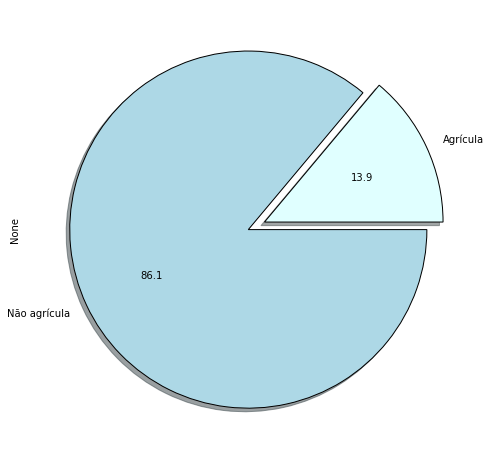

In [93]:
ut1.plot(kind='pie', colors=('lightcyan','lightblue'), shadow=True,explode=(0.1,0),
                 autopct="%0.1f",legend=False, subplots=True, figsize=(8,8))
plt.show()

#### Podemos analisar agora com é a minha população de aposentados comparado ao total.

In [9]:
#Quantidade de pessoas aposentadas ou não

dados2014.V9122.head()

0    4.0
3    4.0
4    4.0
7    4.0
8    4.0
Name: V9122, dtype: float64

In [10]:
n=dados2014.shape[0]
dados2014.V9122 = dados2014.V9122.astype('category')


dados2014.V9122.cat.categories = ('Sim','Não')

dados2014.V9122.head()

print('Frequências relativas por Aposentadoria:')
ut2 = (dados2014.V9122.value_counts()/n*100).round(decimals=1).reindex(['Sim','Não'])
print(ut2,'\n')

Frequências relativas por Aposentadoria:
Sim     5.8
Não    94.2
dtype: float64 



C:\Users\Bruna\Anaconda3\lib\site-packages\pandas\core\generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


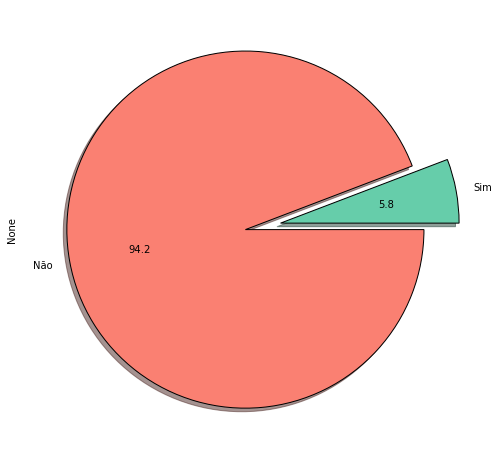

In [11]:
explode=(0.2,0)

ut2.plot(kind='pie', colors=('MediumAquamarine', 'Salmon'), shadow = True, explode=explode,
                 autopct="%0.1f",legend=False, subplots=True, figsize=(8,8))
plt.show()

#### Por fim iremos cruzar ambas para ver como elas se distribuem entre si

In [12]:
#Cruzando as duas tabelas para definir o grupo a ser estudado

print('Tabela Cruzada por total GERAL: agricultura X aposentados')
ct1=pd.crosstab(dados2014.V4747,dados2014.V9122,rownames=['Agricultura'], colnames=['Aposentados'])
ct1

Tabela Cruzada por total GERAL: agricultura X aposentados


Aposentados,Sim,Não
Agricultura,,
Agrícula,4433,20172
Não agrícula,5749,146256


In [13]:
print('Tabela Cruzada por total GERAL (em %):')
ct=(ct1/len(dados2014)*100).round(decimals=0)
ct

Tabela Cruzada por total GERAL (em %):


Aposentados,Sim,Não
Agricultura,,
Agrícula,2.510050,11.421777
Não agrícula,3.255195,82.812978


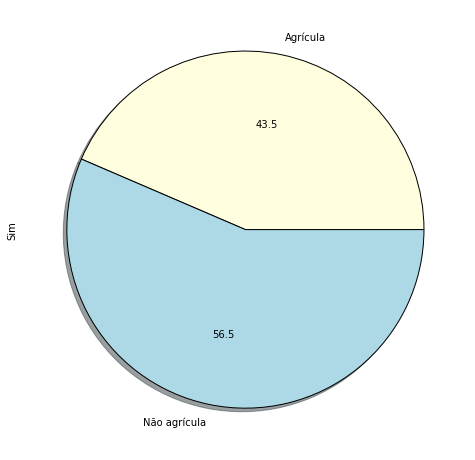

In [94]:
ct1['Sim'].plot(kind='pie', colors=('lightyellow','lightblue'), shadow=True,
                 autopct="%0.1f",legend=False, subplots=True, figsize=(8,8))
plt.show()

### Assim, podemos concluir que nosso grupo de estudo é bem pequeno, próximo de 1,22% da população. Vamos entender como esses agricultores, se distribuem na sociedade e como funciona a aposentadoria.

### Análise 2 - Distribuição das aposentadorias nas populações agrícolas e não agrícola

#### Obsevar se há uma distinção entres as aposentadorias recebidas entre os grupos de estudos. 

In [95]:
#quantidade da aposentadoria que a pessoa recebe V1252

agri_apo = dados2014[(dados2014.V4747=='Agrícula')&(dados2014.V9122=='Sim')]
agri_apo.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
25,25,2014,11,15,10,1,2,15,10,1948,...,2.0,2362.0,6.0,2,1.0,Agrícula,1.0,1.0,2362.0,20160623
66,66,2014,11,23,8,1,2,7,8,1949,...,2.0,2862.0,6.0,5,1.0,Agrícula,1.0,1.0,2862.0,20160623
183,183,2014,11,40,11,1,2,30,12,1950,...,3.0,874.0,4.0,2,1.0,Agrícula,1.0,1.0,874.0,20160623
372,372,2014,11,82,3,1,2,14,3,1948,...,2.0,724.0,3.0,1,1.0,Agrícula,1.0,1.0,724.0,20160623
373,373,2014,11,82,3,2,4,7,11,1950,...,2.0,724.0,3.0,1,1.0,Agrícula,1.0,1.0,724.0,20160623


In [16]:
#cortar todos aqueles que não responderam ao questionário.

dadosCut = agri_apo[(dados2014.V1252!=999999999999) & (dados2014.V4750!=999999999999)]


C:\Users\Bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [17]:
dadosCut.V1252.describe()

count     4238.000000
mean       868.394998
std        805.067136
min        622.000000
25%        724.000000
50%        724.000000
75%        724.000000
max      20000.000000
Name: V1252, dtype: float64

In [18]:
faixa=arange(600,  6000, 100)
b = pd.cut(dadosCut.V1252, faixa).value_counts(True)*100

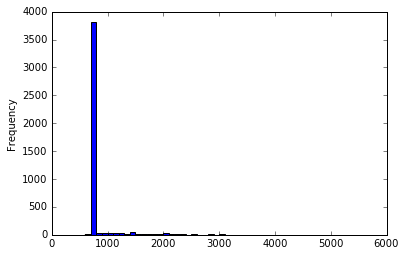

In [19]:
dadosCut.V1252.plot.hist(bins=faixa)

#### Temos acima o valor das aposentadorias por frequência em que elas aparecem. Obs: Apenas se referem aos agricultors aposentados.

In [20]:
#não agricultores com aposentadoria


Nagri_apo = dados2014[(dados2014.V4747=='Não agrícula')&(dados2014.V9122=='Sim')]
Nagri_apo.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
77,77,2014,11,23,13,1,4,27,2,1956,...,2.0,924.0,4.0,2,1.0,Não agrícula,2.0,1.0,924.0,20160623
87,87,2014,11,23,16,1,4,3,5,1951,...,2.0,1321.0,4.0,1,1.0,Não agrícula,2.0,1.0,1321.0,20160623
98,98,2014,11,31,2,1,2,0,20,71,...,2.0,762.0,4.0,2,1.0,Não agrícula,2.0,1.0,762.0,20160623
138,138,2014,11,31,16,1,4,15,6,1975,...,5.0,1248.0,4.0,4,1.0,Não agrícula,2.0,1.0,1248.0,20160623
257,257,2014,11,66,1,1,2,19,5,1937,...,2.0,1162.0,4.0,1,1.0,Não agrícula,2.0,1.0,1162.0,20160623


In [21]:
dadosCut2 = Nagri_apo[(dados2014.V1252!=999999999999)]

C:\Users\Bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [22]:
dadosCut2.V1252.describe()

count     5611.000000
mean      1581.517911
std       1832.260908
min        650.000000
25%        724.000000
50%        850.000000
75%       1800.000000
max      29000.000000
Name: V1252, dtype: float64

In [23]:
faixa=arange(600,  6000, 100)
a = pd.cut(dadosCut2.V1252, faixa).value_counts(True)*100


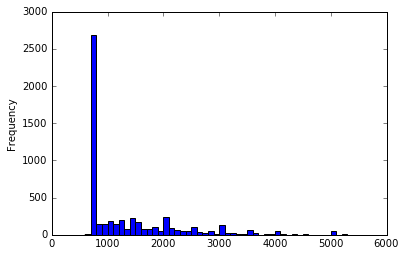

In [24]:
dadosCut2.V1252.plot.hist(bins=faixa)

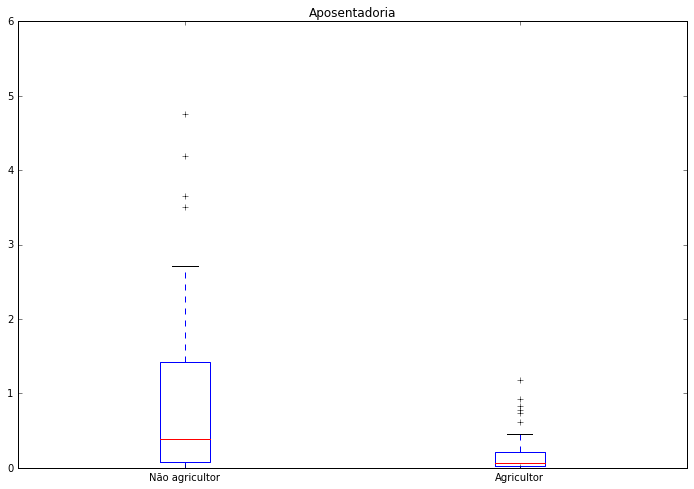

In [25]:
x=pd.DataFrame([a,b], index=('Não agricultor', 'Agricultor'))
x=x.T

x.plot(kind='box', title='Aposentadoria', figsize=(12,8))

axes = plt.gca()
axes.set_ylim([0,6])
plt.show()

 ### <font color='blue'>Conclusão da primeira análise</font>

##### Assim percebemos que ambas as médias estão bem próximas. A moda em ambas é em torno de 700 a 800. Porém podemos notar que a frequência em que aparece nos agricultores é de aproximadamente 90%, enquanto nos não agricultores constituem metade das respostas. Assim podemos concluir que há uma desigualdade na distribuição de aposentadoria.

-

 # <font color='blue'>Análise 2 - quantidade de aposentados depois dos 60</font>

### Hoje a aposentadoria é bastante burocratica. Para pessoas com carteira de trabalho assinada este processo pode ser facilitado, porém para aqueles que trabalham na agricultura isto pode se complicar. Uma vez que a maioria destas pessoas nem possuem algum registo de trabalho, preciando entrar com processos demorados que nem sempre termina em aposentadoria.

### Para tanto vamos analisar de que forma essas aposentadorias se distribuem para idosos acima de 60 anos entre os agricultores e os não agricultores.

In [26]:
#adicionaremos a variável 'V8005' responsável por determinar a idade do entrevistado.
#primeiro excluir todos aqueles que são menores de 60 anos.

dadosCut3 = dados2014[(dados2014.V8005>=60)]
dadosCut3.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
7,7,2014,11,15,4,2,2,7,3,1954,...,5.0,1700.0,5.0,1,1.0,Não agrícula,2.0,1.0,1700.0,20160623
15,15,2014,11,15,6,1,2,20,11,1953,...,2.0,850.0,4.0,2,1.0,Não agrícula,2.0,1.0,850.0,20160623
18,18,2014,11,15,7,2,2,22,3,1954,...,5.0,3220.0,6.0,7,1.0,Não agrícula,2.0,1.0,3220.0,20160623
25,25,2014,11,15,10,1,2,15,10,1948,...,2.0,2362.0,6.0,2,1.0,Agrícula,1.0,1.0,2362.0,20160623
66,66,2014,11,23,8,1,2,7,8,1949,...,2.0,2862.0,6.0,5,1.0,Agrícula,1.0,1.0,2862.0,20160623


In [27]:
print('Tabela Cruzada por total GERAL: agricultura X aposentados, +60')
ct4=pd.crosstab(dadosCut3.V4747,dadosCut3.V9122,margins=True, rownames=['Agricultura'], colnames=['Aposentados'])
ct4

Tabela Cruzada por total GERAL: agricultura X aposentados, +60


Aposentados,Sim,Não,All
Agricultura,,,
Agrícula,3699,954,4653
Não agrícula,3871,5418,9289
All,7570,6372,13942


In [28]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [29]:
print('Tabela Cruzada por total de LINHAS (em %):')
ct5=pd.crosstab(dadosCut3.V9122,dadosCut3.V4747,rownames=['Aposentados'], margins=True, colnames=['Agricultura']).apply(percConvert, axis=1)
ct5

Tabela Cruzada por total de LINHAS (em %):


Agricultura,Agrícula,Não agrícula,All
Aposentados,,,
Sim,49.0,51.0,100.0
Não,15.0,85.0,100.0
All,33.0,67.0,100.0


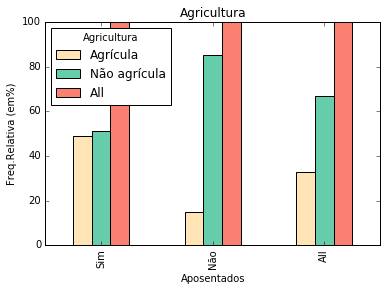

In [30]:
ct5 = ct5.iloc[0:5,]
plot = ct5.plot(kind='bar',title='Agricultura', color =('Moccasin', 'MediumAquamarine', 'Salmon'))
plt.ylabel('Freq.Relativa (em%)')

 ### <font color='blue'>Conclusão da primeira análise</font>

#### Conseguimos notar que os idosos (acima de 60 anos)aposentados e economicamente ativos estão distribuidos igualmente entre os agricultores e não agricultores. Apesar de os agricultores serem minoria no total mesmos assim eles conseguem se aposentar em boa quantidade.

 # <font color='blue'>Análise 3 - valores da renda de família</font>
 
#### Como vemos, a aposentadoria dos não agricultores são maiores comparado com aqueles que são agricultores. Mas como será o comportamento das rendas familiares dessa população?

In [31]:
#Filtrando para apenas salários respondidos e para apposentados

dadosCut4=dadosCut3[(dadosCut3.V4750!=999999999999) & (~dadosCut3.V9122.isnull()) & (dadosCut3.V9122=='Sim')]
dadosCut4.V4750.describe()



count      7113.000000
mean       1939.726698
std        4889.525146
min          80.000000
25%         724.000000
50%        1074.000000
75%        1808.000000
max      331200.000000
Name: V4750, dtype: float64

In [32]:
faixa=arange(80, 10000, 100)
c = pd.cut(dadosCut4.V4750, faixa).value_counts(True)*100
c

(680, 780]      15.077139
(780, 880]       6.760168
(480, 580]       6.185133
(1080, 1180]     5.638149
(880, 980]       5.511921
(1380, 1480]     5.119215
(980, 1080]      4.137447
(580, 680]       4.123422
(1180, 1280]     3.955119
(380, 480]       3.646564
(280, 380]       3.183731
(1280, 1380]     2.931276
(1680, 1780]     2.412342
(1480, 1580]     2.159888
(1580, 1680]     1.809257
(1780, 1880]     1.612903
(180, 280]       1.542777
(1880, 1980]     1.388499
(2080, 2180]     1.304348
(1980, 2080]     1.276297
(2180, 2280]     1.136045
(2680, 2780]     0.827489
(2380, 2480]     0.757363
(2780, 2880]     0.701262
(2480, 2580]     0.645161
(2280, 2380]     0.603086
(3180, 3280]     0.589060
(2580, 2680]     0.575035
(2980, 3080]     0.561010
(2880, 2980]     0.532959
                  ...    
(7080, 7180]     0.112202
(4880, 4980]     0.112202
(6680, 6780]     0.098177
(8580, 8680]     0.098177
(5380, 5480]     0.098177
(7280, 7380]     0.098177
(8980, 9080]     0.084151
(9380, 9480]

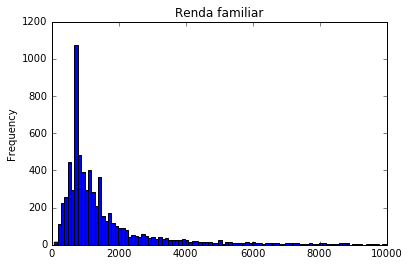

In [33]:
dadosCut4.V4750.plot.hist(bins=faixa, title='Renda familiar')
plt.show()

In [34]:
dadosCut5=dadosCut3[(dadosCut3.V4750!=999999999999) & (~dadosCut3.V9122.isnull()) & (dadosCut3.V9122=='Não')]
dadosCut5.V4750.describe()

count     6012.000000
mean      1636.263473
std       2675.095844
min          0.000000
25%        574.000000
50%        907.500000
75%       1600.000000
max      76500.000000
Name: V4750, dtype: float64

In [35]:
faixa=arange(80, 10000, 100)
d = pd.cut(dadosCut5.V4750, faixa).value_counts(True)*100


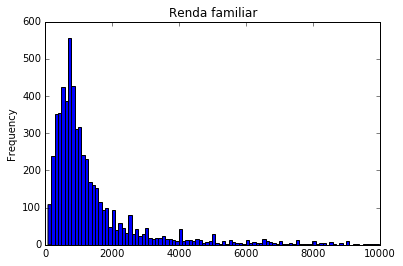

In [36]:
dadosCut5.V4750.plot.hist(bins=faixa, title='Renda familiar')
plt.show()

Abaixo está os dois gráficos juntos para análise

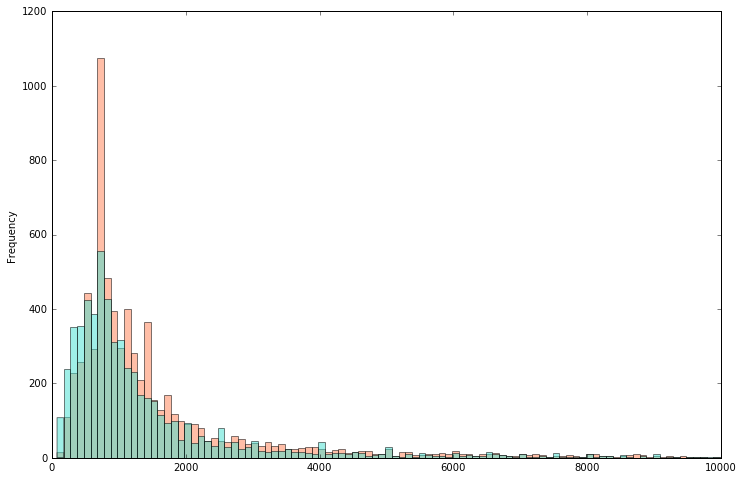

In [37]:
plot=dadosCut4.V4750.plot.hist(bins=faixa, color='coral', figsize=(12,8), alpha=0.5)
plot=dadosCut5.V4750.plot.hist(bins=faixa, color='turquoise', figsize=(12,8), alpha=0.5)


Podemos notar que a renda das famílias agricultoras é menor do que aquelas não agricultoras. Mostrando a desilgualdade entre essas população.

## <font color='blue'>Análise 4 - Questão de sexos na aposentadoria</font>

como essa situação se mostra com distinção de sexos. Podemos ver se há uma desilgualdades entre as mulheres do campo e os homens. Se elas estão conseguindo se aposentar ou não. 

In [38]:
dadosCut6 = dados2014[(~dados.V0302.isnull())]


C:\Users\Bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [39]:
n=dadosCut6.shape[0]
dadosCut6.V0302 = dadosCut6.V0302.astype('category')

dadosCut6.V0302.cat.categories = ('Masculino','Feminino')

dadosCut6.V0302.head()

print('Frequências relativas por :')
ut7 = (dadosCut6.V0302.value_counts()/n*100).round(decimals=1).reindex(['Masculino','Feminino'])
print(ut7)

Frequências relativas por :
Masculino    57.0
Feminino     43.0
dtype: float64


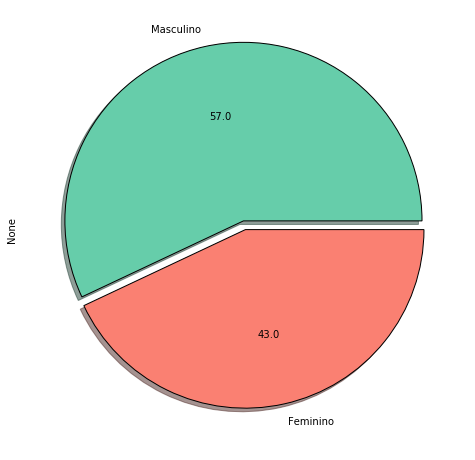

In [40]:
explode=(0.05,0)

ut7.plot(kind='pie', colors=('MediumAquamarine', 'Salmon'), shadow = True, explode=explode,
                 autopct="%0.1f",legend=False, subplots=True, figsize=(8,8))
plt.show()

Assim, percebemos que temos uma população ligeiramente maior de homens entre os entrevistados. Mas como será esta comparação entre os oposentados agricultores?

In [41]:
dadosCut7 = dadosCut[(dadosCut.V0302 == 4)] #mulheres
dadosCut8 = dadosCut[(dadosCut.V0302 == 2)] #homens

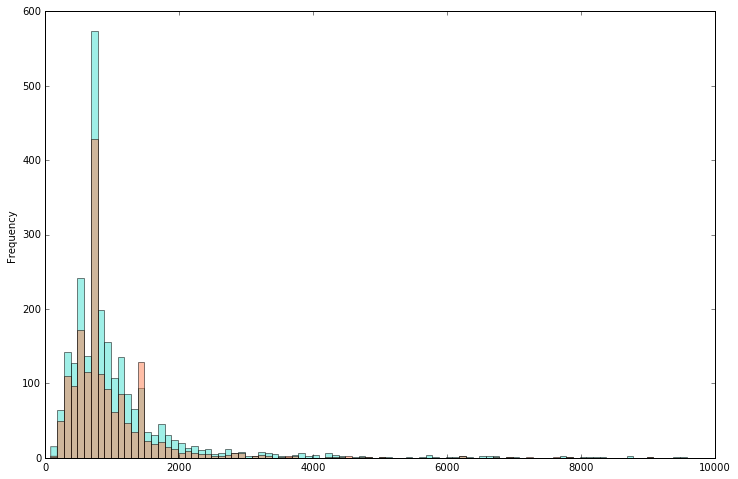

In [42]:
plot=dadosCut8.V4750.plot.hist(bins=faixa, color='turquoise', figsize=(12,8), alpha=0.5)
plot=dadosCut7.V4750.plot.hist(bins=faixa, color='coral', figsize=(12,8), alpha=0.5)

Assim, concluimos que tantos as mulheres como os homens possuem uma aposentadoria semelhante em termos de valores. Também podemos tirar desse gráfico que há mais homens entres os agricolas do que mulheres.

Já no caso dos não agricultores temo a seguinte configuração:

In [43]:
dadosCut9 = dadosCut2[(dadosCut2.V0302 == 4)] #mulheres
dadosCut10 = dadosCut2[(dadosCut2.V0302 == 2)] #homens

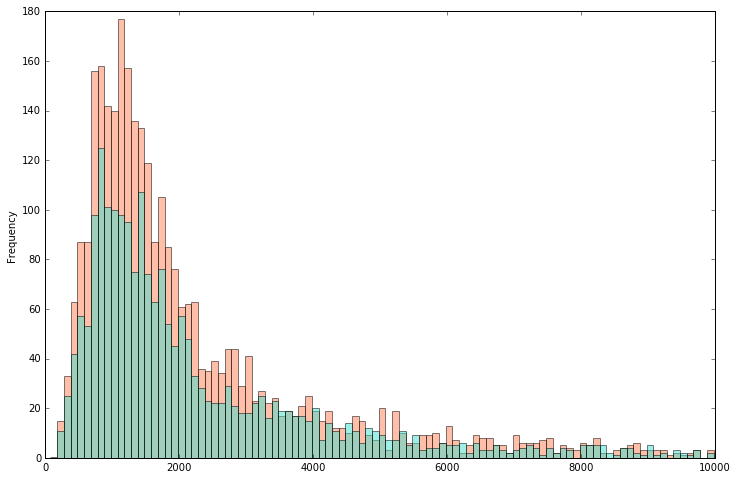

In [44]:
plot=dadosCut10.V4750.plot.hist(bins=faixa, color='coral', figsize=(12,8), alpha=0.5)
plot=dadosCut9.V4750.plot.hist(bins=faixa, color='turquoise', figsize=(12,8), alpha=0.5)

Neste histograma também podemos ver o equilíbrio entre as aposentadorias recebidas dos dois sexos. Também conseguimos notar que há uma predominância de mulheres na região não agrícola.

Sendo assim, se compararmos ambos os sexos das duas regiões iremos notar que a configuração será semelhante aquela encontrada quando comparada sem distinção de sexo. Abaixo vemos como seria se comparassemos as mulheres das duas regiôes e suas rendas.

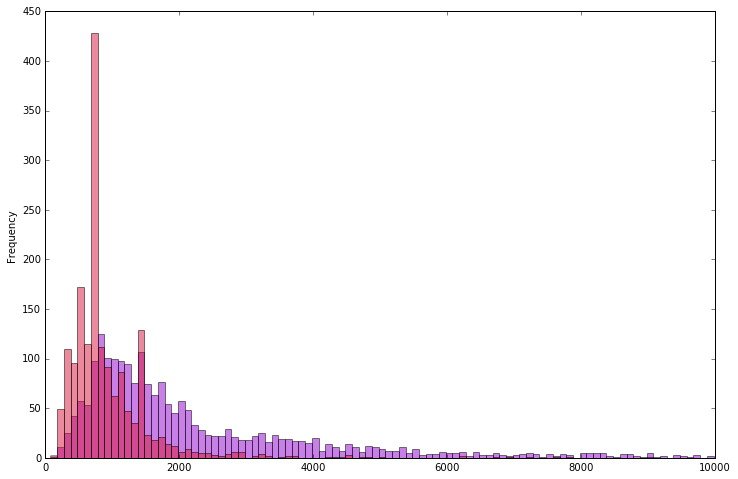

In [45]:
plot=dadosCut9.V4750.plot.hist(bins=faixa, color='darkviolet', figsize=(12,8), alpha=0.5)
plot=dadosCut7.V4750.plot.hist(bins=faixa, color='crimson', figsize=(12,8), alpha=0.5)

## <font color='blue'>Análise 4 - distribuição dos aposentados agrícolas por região<font>

#### Nesta análise iremos ver como as rendas dos aposentados agrícolas estão distribuidos pelas regiões brasileiras.

In [46]:
dadosCut['Reg']=dadosCut.UF
dadosCut.Reg[(dadosCut.UF>10)&(dadosCut.UF<=17)]=1
dadosCut.Reg[(dadosCut.UF>20)&(dadosCut.UF<=29)]=2
dadosCut.Reg[(dadosCut.UF>30)&(dadosCut.UF<=35)]=3
dadosCut.Reg[(dadosCut.UF>40)&(dadosCut.UF<=43)]=4
dadosCut.Reg[(dadosCut.UF>=50)&(dadosCut.UF<=53)]=5

C:\Users\Bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Bruna\Anaconda3\lib\site-packages\pandas\core\generic.py:4428: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(

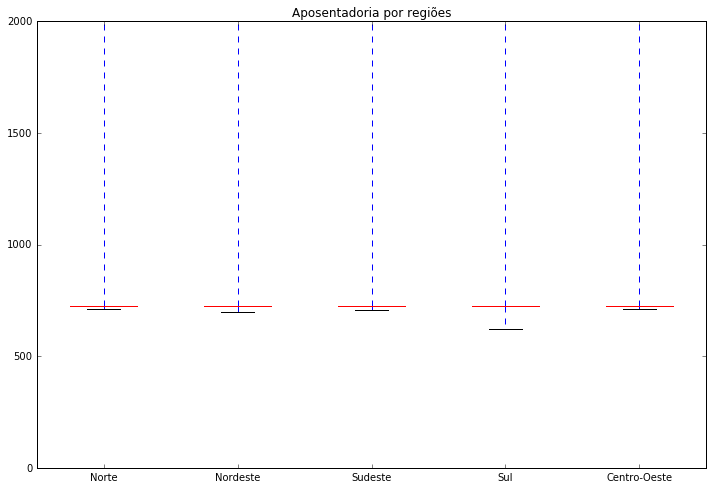

In [47]:
a = pd.DataFrame([dadosCut.V1252[dadosCut.Reg==1],dadosCut.V1252[dadosCut.Reg==2],
                  dadosCut.V1252[dadosCut.Reg==3], dadosCut.V1252[dadosCut.Reg==4],
                  dadosCut.V1252[dadosCut.Reg==5]],index=('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'))
a=a.T
a.plot(kind='box', title='Aposentadoria por regiões', figsize=(12,8))

axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

Conseguimos notar que a distribuição de aposentadoria é bastante semelhantes em todas as regiões.

Análise 8 - como a aposentadoria se distribui por idade em cada região

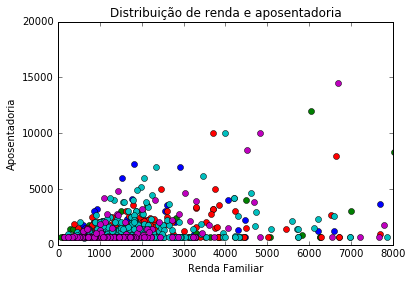

In [100]:
plt.plot(dadosCut.V4750[dadosCut.Reg==1],dadosCut.V1252[dadosCut.Reg==1], 'o')
plt.plot(dadosCut.V4750[dadosCut.Reg==2],dadosCut.V1252[dadosCut.Reg==2], 'o')
plt.plot(dadosCut.V4750[dadosCut.Reg==3],dadosCut.V1252[dadosCut.Reg==3], 'o')
plt.plot(dadosCut.V4750[dadosCut.Reg==4],dadosCut.V1252[dadosCut.Reg==4], 'o')
plt.plot(dadosCut.V4750[dadosCut.Reg==5],dadosCut.V1252[dadosCut.Reg==5], 'o')


plt.xlabel('Renda Familiar')
plt.ylabel('Aposentadoria')
plt.title('Distribuição de renda e aposentadoria')
axes = plt.gca()
axes.set_xlim(0,8000)
plt.show()

Conclusão da Análise 6
podemos concluir que a maioria da renda familiar desses posentados não vem diretamente da aposentadoria.

## <font color='blue'>Análise 5 - Distibuição de aposentadoria para agricultores por raça</font>

In [49]:
dadosCut11 = dadosCut[(dadosCut.V0404!=9)]

dadosCut11.V0404 = dadosCut.V0404.astype('category')

dadosCut11.V0404.cat.categories = ('Branca','Preta', 'Amarela', 'Parda', 'Indígena')

dadosCut11.V0404.head()

25        Preta
66        Preta
183    Indígena
372    Indígena
373       Preta
Name: V0404, dtype: category
Categories (5, object): [Branca, Preta, Amarela, Parda, Indígena]

In [50]:
dadosCutB = dadosCut11[(dadosCut11.V0404=="Branca")]

In [51]:
faixa=arange(600,  5000, 100)
branca = pd.cut(dadosCutB.V1252, faixa).value_counts(True)*100

In [52]:
dadosCutPr = dadosCut11[(dadosCut11.V0404=="Preta")]

In [53]:
faixa=arange(600,  5000, 100)
preta = pd.cut(dadosCutPr.V1252, faixa).value_counts(True)*100

In [54]:
dadosCutA = dadosCut11[(dadosCut11.V0404=="Amarela")]

In [55]:
faixa=arange(600,  5000, 100)
amarela = pd.cut(dadosCutA.V1252, faixa).value_counts(True)*100


In [56]:
dadosCutPa = dadosCut11[(dadosCut11.V0404=="Parda")]

In [57]:
faixa=arange(600,  5000, 100)
parda = pd.cut(dadosCutPa.V1252, faixa).value_counts(True)*100


In [58]:
dadosCutI = dadosCut11[(dadosCut11.V0404=="Indígena")]

In [59]:
faixa=arange(600,  5000, 100)
indigena = pd.cut(dadosCutI.V1252, faixa).value_counts(True)*100


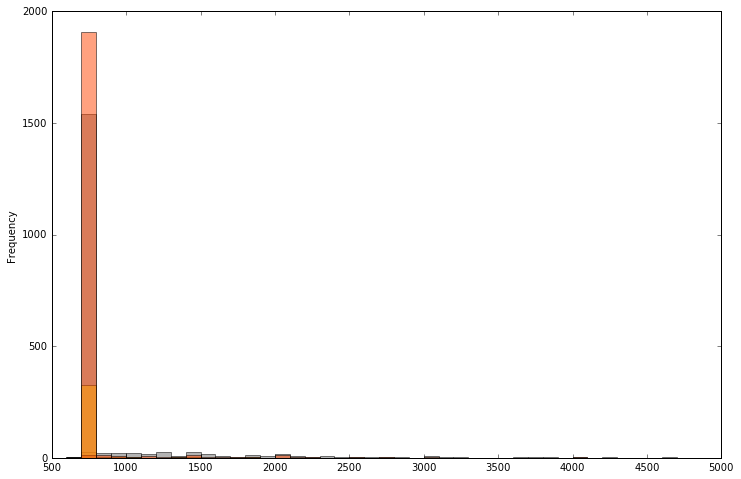

In [60]:
plot=dadosCutB.V1252.plot.hist(bins=faixa, color='moccasin', figsize=(12,8), alpha=0.5)
plot=dadosCutPr.V1252.plot.hist(bins=faixa, color='dimgrey', figsize=(12,8), alpha=0.5)
plot=dadosCutA.V1252.plot.hist(bins=faixa, color='yellow', figsize=(12,8), alpha=0.5)
plot=dadosCutPa.V1252.plot.hist(bins=faixa, color='chocolate', figsize=(12,8), alpha=0.5)
plot=dadosCutI.V1252.plot.hist(bins=faixa, color='orangered', figsize=(12,8), alpha=0.5)

Aproximando este gráfico temos o seguinte:

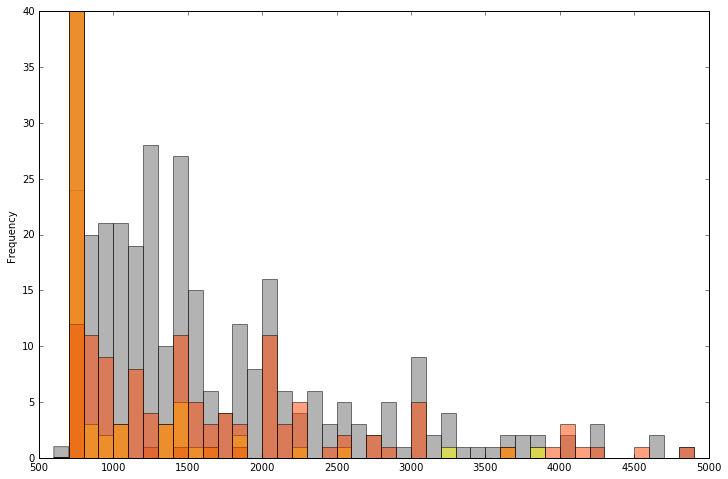

In [61]:
plot=dadosCutB.V1252.plot.hist(bins=faixa, color='moccasin', figsize=(12,8), alpha=0.5)
plot=dadosCutPr.V1252.plot.hist(bins=faixa, color='dimgrey', figsize=(12,8), alpha=0.5)
plot=dadosCutA.V1252.plot.hist(bins=faixa, color='yellow', figsize=(12,8), alpha=0.5)
plot=dadosCutPa.V1252.plot.hist(bins=faixa, color='chocolate', figsize=(12,8), alpha=0.5)
plot=dadosCutI.V1252.plot.hist(bins=faixa, color='orangered', figsize=(12,8), alpha=0.5)

axes = plt.gca()
axes.set_ylim([0,40])
plt.show()

Conseguimos notar que a distribuição entre raças está bastante equilibrada.

In [62]:
a=pd.DataFrame([dadosCutB.V1252,dadosCutPr.V1252,dadosCutA.V1252,dadosCutPa.V1252,dadosCutI.V1252])

## <font color='blue'>Análise 6 - Comparação entre os aposentados agricultores de 2014 e 2001</font>

A comparação feita é para ver como ocorreu o processo de apoentadoria para a população rural. Se no passado havia mais agricultores aposentados ou hoje esse percentual é maior ou ainda se ele se manteve consante no tempo.

In [63]:
dados2001 = pd.read_csv('PES2001.csv', sep=',')

In [64]:
dados2001.head()

,v0101,uf,v0102,v0103,v0301,v0302,v3031,v3032,v3033,v8005,...,v2201,v2202,v1623,v1624,v1625,v1626,v1627,v1628,v1629,v1630
0,2001,11,11000000.0,1,4.0,4.0,18.0,7.0,1978.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,11,11000000.0,1,3.0,2.0,3.0,5.0,1977.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,11,11000000.0,1,5.0,4.0,19.0,7.0,1998.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,11,11000000.0,1,2.0,4.0,6.0,5.0,1982.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,11,11000000.0,1,1.0,4.0,21.0,7.0,1957.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
dados2001.v4708 = dados2001.v4708.astype('category')
dados2001.v4708.cat.categories=('ig', 'Agrícola', 'Não agrícola', 'ig0', 'ig1', 'ig2')



In [66]:

dados01c = dados2001[(dados2001.v4708=='Agrícola') | (dados2001.v4708== ('Não agrícola'))]


In [67]:
dados2001.v9122

0         4.0
1         4.0
2         NaN
3         4.0
4         4.0
5         4.0
6         4.0
7         4.0
8         4.0
9         4.0
10        4.0
11        2.0
12        NaN
13        4.0
14        4.0
15        4.0
16        4.0
17        4.0
18        4.0
19        4.0
20        4.0
21        2.0
22        4.0
23        4.0
24        4.0
25        4.0
26        4.0
27        4.0
28        4.0
29        4.0
         ... 
378813    4.0
378814    4.0
378815    4.0
378816    4.0
378817    4.0
378818    4.0
378819    4.0
378820    4.0
378821    4.0
378822    4.0
378823    4.0
378824    4.0
378825    NaN
378826    4.0
378827    4.0
378828    4.0
378829    4.0
378830    4.0
378831    4.0
378832    NaN
378833    4.0
378834    4.0
378835    NaN
378836    4.0
378837    4.0
378838    4.0
378839    4.0
378840    4.0
378841    4.0
378842    4.0
Name: v9122, dtype: float64

In [68]:
dados2001.v9122 = dados2001.v9122.astype('category')
dados2001.v9122.cat.categories=('ig','Sim', 'Não')

In [69]:
dados01c2 = dados2001[(~dados2001.v9122.isnull())]
dados01c2.v9122

0         Não
1         Não
3         Não
4         Não
5         Não
6         Não
7         Não
8         Não
9         Não
10        Não
11        Sim
13        Não
14        Não
15        Não
16        Não
17        Não
18        Não
19        Não
20        Não
21        Sim
22        Não
23        Não
24        Não
25        Não
26        Não
27        Não
28        Não
29        Não
30        Não
31        Não
         ... 
378809    Não
378810    Não
378812    Não
378813    Não
378814    Não
378815    Não
378816    Não
378817    Não
378818    Não
378819    Não
378820    Não
378821    Não
378822    Não
378823    Não
378824    Não
378826    Não
378827    Não
378828    Não
378829    Não
378830    Não
378831    Não
378833    Não
378834    Não
378836    Não
378837    Não
378838    Não
378839    Não
378840    Não
378841    Não
378842    Não
Name: v9122, dtype: category
Categories (3, object): [ig, Sim, Não]

In [101]:
print('Tabela Cruzada por total GERAL: agricultura X aposentados, +60')
ct10=pd.crosstab(dados01c2.v9122,dados01c.v4708,margins=True, rownames=['Apoentados'], colnames=['Agricultura']).apply(percConvert, axis=1)


ab = ct10.iloc[1:3, 1:3]
ab

Tabela Cruzada por total GERAL: agricultura X aposentados, +60


Agricultura,Agrícola,Não agrícola
Apoentados,,
Sim,14.0,16.0
Não,8.0,42.0


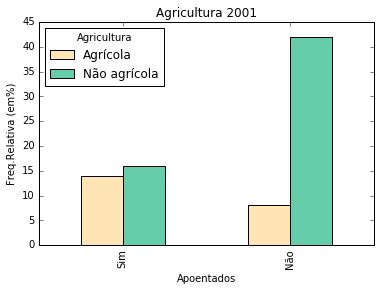

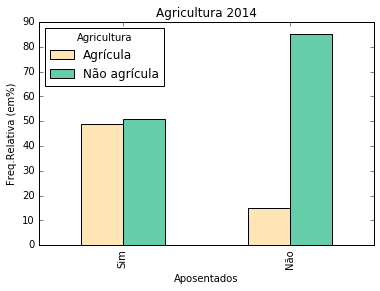

In [102]:
plot = ab.plot(kind='bar',title='Agricultura 2001', color =('Moccasin', 'MediumAquamarine'))
plt.ylabel('Freq.Relativa (em%)')
plot

ct5 = ct5.iloc[0:2,0:2]
plot = ct5.plot(kind='bar',title='Agricultura 2014', color =('Moccasin', 'MediumAquamarine', 'Salmon'))
plt.ylabel('Freq.Relativa (em%)')

Como podemos ver comparado com o primeiro gráfico vemos uma evolução na aposentadoria. Hoje muito mais gente se encontra aposetada em relação ao passado. Porém a relatividade entre a frequencia entre os agrícolas e não agrícolas se manteve constante.

## <font color='blue'>Conclusão Geral</font>

#### Podemos concluir que após todas estas pesquisas, na maior parte dos casos a diferença entre os aposentados agrícolas e não agrícolas se mante semelhantes. Assim, não há uma grande diferença entre esses aposentados em quesito de conseguir se aposentar. A comparação entre os sexos e entre as raças/cor também não tem grandes diferenças para a aposentadoria. A única grande diferença é quando se trata do valor desssa aposentadoria, aqueles da região não agrícola conseguem aposentadorias de valores mais altos comparados com aqueles da regiõ agrícola. Porém a moda entre ambas giram em torno de um salário mínimo, na faixa de 700 à 800 reais.